# Tensorflow demo

In this demo we will get familiar tensorflow:keras: https://keras.io/


First we do all the imports

In [1]:
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras import Sequential, losses, optimizers, utils
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, save_model
from matplotlib import pyplot as plt
import random

Next we will create a model.
- The input shape will 1x28x28 because the image is 28x28
    - Activation:
        - relu: Hidden layer ot use
        - softmax: Output layer by classification
- Conv2D: is a convolutional 2D layer that will be used as an input layer
- MaxPooling2D: is a pooling layer
- Dropout: will randomly set some weight to 0, this can be used to enhance precision
    - Percentage of weights that should be dropped
- Flatten: Will flatten our 2D shape into a 1D shape
- Dense: A filly connected layer
- Compile: The neural network will compile into a tensorflow graph
    - loss: the used loss function (most of the time: root mean squared error)
    - optimizer: The used optimizer (most of the time: sgd = Stochastic gradient descent 

In [2]:
def create_model():
    if K.image_data_format() == 'channels_first':
        input_shape = (1, 28, 28)  # (1, img_rows, img_cols)
    else:
        input_shape = (28, 28, 1)  # (img_rows, img_cols, 1)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer="sgd",
                  metrics=['accuracy'])
    return model

Preprocessing: We have to prepare the X & Y data

In [3]:
def prepare_X_data(x_unprepared_data, printing=True):
    if printing:
        print("unprepared X_shape:" + str(x_unprepared_data.shape))

    img_rows = x_unprepared_data.shape[1]
    img_cols = x_unprepared_data.shape[2]

    if K.image_data_format() == 'channels_first':
        x_data = x_unprepared_data.reshape(x_unprepared_data.shape[0], 1, img_rows, img_cols)
    else:
        x_data = x_unprepared_data.reshape(x_unprepared_data.shape[0], img_rows, img_cols, 1)

    x_data = x_data.astype('float32')
    x_data /= 255
    if printing:
        print('prepared X_data shape:', x_data.shape)
        print("")
    return x_data

def prepare_Y_data(y_unpreprared_data, printing=True):
    if printing:
        print("unprepared Y_shape:" + str(y_unpreprared_data.shape))
    y_data = utils.to_categorical(y_unpreprared_data, 10)
    if printing:
        print('prepared Y_data shape:', y_data.shape)
        print("")
    return y_data

Next we create a method to randomly select a test item. This test item will be predicted and matched against the ground truth

In [4]:
def random_predict(model):
    (_, _), (x_test, y_test) = mnist.load_data()
    index = random.randint(0, len(x_test) - 1)
    X = x_test[index]
    print("Input: " + str(X))
    image = np.array(X, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    X = prepare_X_data(x_unprepared_data=np.array([X]),printing=False)
    prediction = model.predict(X)
    print("Prediction array: " + str(prediction))
    print("Prediction: " + str(np.argmax(prediction)))
    print("Ground truth: " + str(y_test[index]))
    print("")

We combine the above methods to train the model. 
Loading de MNIST-dataset and split this dataset into training and testing, this method will only use the training data.
After training we will save the model in order to not lose our training progression.

In [5]:
def train_model(model):
    (x_train, y_train), (_, _) = mnist.load_data()
    x_prep_train = prepare_X_data(x_unprepared_data=x_train)
    y_prep_train = prepare_Y_data(y_unpreprared_data=y_train)
    model.fit(x_prep_train, y_prep_train, batch_size=128, epochs=12, verbose=1)
    print("save model")
    print("")
    save_model(model=model, filepath="example_model.h5")

After training we have to evaluate our training model with the test set.

In [6]:
def eval_model(model):
    (_, _), (x_test, y_test) = mnist.load_data()
    x_prep_test = prepare_X_data(x_unprepared_data=x_test, printing=False)
    y_prep_test = prepare_Y_data(y_unpreprared_data=y_test, printing=False)
    score = model.evaluate(x_prep_test, y_prep_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print("")

No we can use all the methods to build, train and test the model. 
10 randomly selected items will be predicted to see the prediction output

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

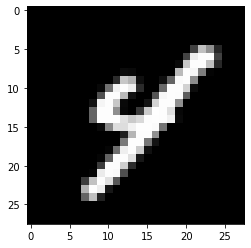

Prediction array: [[4.1987292e-08 1.7522674e-05 1.7484923e-06 1.6210385e-07 9.9974650e-01
  8.0292972e-05 5.0922940e-06 3.8089813e-05 2.8878603e-05 8.1579492e-05]]
Prediction: 4
Ground truth: 4

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   5  59 164 253 255 135   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  20 251 251 251 253 134   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  20 251 251 251 253 134   0
    0   0   0   0   0 

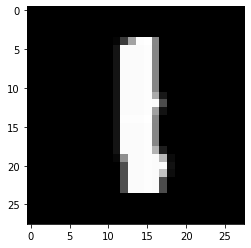

Prediction array: [[1.69753127e-06 9.97914970e-01 1.08559354e-04 1.57726681e-04
  2.16325043e-05 1.82581553e-05 8.23371229e-05 6.85942859e-06
  1.60573423e-03 8.21943395e-05]]
Prediction: 1
Ground truth: 1

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 128  64   0   0   0   0   0   0   0   0   0
    0   0 128 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255 128   0   0   0   0   0   0   0   0   0
    0   0 

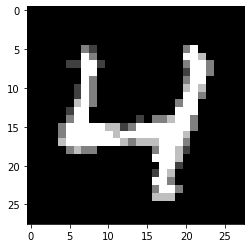

Prediction array: [[3.1159794e-07 4.9001461e-09 3.2295400e-05 7.6325414e-08 9.9987221e-01
  1.1385346e-05 2.4219968e-05 3.2098869e-06 1.7354827e-06 5.4433072e-05]]
Prediction: 4
Ground truth: 4

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   8  16   2  20
    9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  13 145 236 181 253
  211  41   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  96 230 253 254 253 253
  253 200   0   0   0 

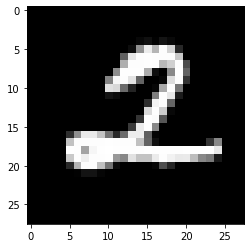

Prediction array: [[2.1884041e-07 1.3188072e-05 9.9966407e-01 1.6701418e-04 2.2877219e-07
  2.2650479e-06 3.3323115e-06 1.2284660e-04 2.5011173e-05 1.8135977e-06]]
Prediction: 2
Ground truth: 2

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  96 143 255 254 254
  254 210  25   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 154 234 250 253 253 253 253
  253 253 181   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  11  84 213 252 253 253 253 253 253 253
  253 253 191   0   0 

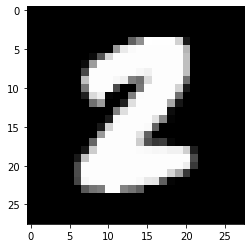

Prediction array: [[2.9053765e-05 8.9261644e-03 7.0073861e-01 3.0965870e-02 3.4693517e-08
  2.2535314e-05 9.8613273e-06 2.0496488e-04 2.5909606e-01 6.8570580e-06]]
Prediction: 2
Ground truth: 2

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 

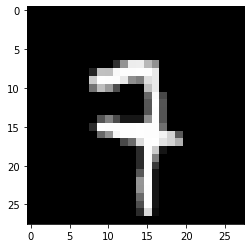

Prediction array: [[3.2519861e-07 7.9650075e-05 3.8291956e-03 1.3251253e-02 2.1038624e-04
  1.2071802e-04 1.3486410e-06 9.5945412e-01 3.0157697e-05 2.3022791e-02]]
Prediction: 7
Ground truth: 7

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   6 186 140 242  46
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 121 253 254 159   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  32 234 236 254 109   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 218 253 110 142  36   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  50 157 237  11   0   0   0
    0   0   0   0   0 

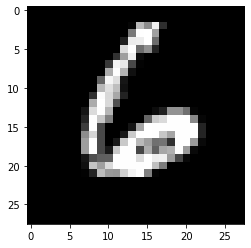

Prediction array: [[4.7999390e-07 8.0971905e-09 1.2684119e-04 1.5071238e-08 3.4031927e-05
  3.4529567e-05 9.9980301e-01 3.9431949e-08 1.1220553e-06 1.9392424e-08]]
Prediction: 6
Ground truth: 6

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  39
  227 254 143   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 146 245
  253 253 156   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 150 251 253
  253 155   8   0   0 

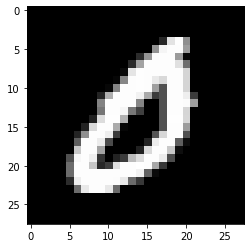

Prediction array: [[9.9640143e-01 6.3165348e-06 2.5142927e-03 1.7228161e-04 1.3183781e-04
  3.1144074e-05 5.6390872e-05 7.6769065e-05 1.9309980e-04 4.1646595e-04]]
Prediction: 0
Ground truth: 0

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  21 152 233 193 193 203   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  41 223 253 252 253 252 243 122   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  21 173 253 224 162 132 253 203   0   0
    0   0   0   0   0 

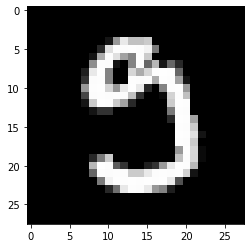

Prediction array: [[4.2329949e-01 1.4284327e-04 4.5663575e-03 2.1555007e-02 7.3746869e-06
  5.4520935e-01 4.1619267e-05 2.7924245e-03 1.3384874e-03 1.0471098e-03]]
Prediction: 5
Ground truth: 9

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 241  21   0   0   0   0   0   0   0   0
    0   0   0   0   0 

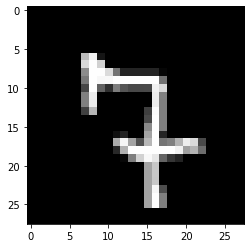

Prediction array: [[1.9227034e-04 4.4690021e-03 8.9422464e-03 4.1523743e-03 2.3335745e-03
  1.5183243e-03 1.3607665e-04 9.7258425e-01 9.0995996e-04 4.7619967e-03]]
Prediction: 7
Ground truth: 7



In [7]:
model = create_model()
model.summary()
# train_model(model=model)
model = load_model("example_model.h5")
eval_model(model)
for _ in range(10):
    random_predict(model)

A correct example:

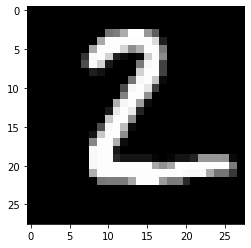

Prediction array: [[6.0280847e-05 3.1808595e-04 9.9914527e-01 4.1767690e-04 1.3485847e-09
  1.5691418e-05 2.4972935e-05 1.2815385e-08 1.7830731e-05 2.6881009e-09]]
Prediction: 2
Ground truth: 2


In [8]:
(_, _), (x_test, y_test) = mnist.load_data()
image = x_test[1]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
Y = prepare_X_data(x_unprepared_data=np.array([image]), printing=False)
prediction = model.predict(Y)
print("Prediction array: " + str(prediction))
print("Prediction: " + str(np.argmax(prediction)))
print("Ground truth: " + str(y_test[1]))

A incorrect example:

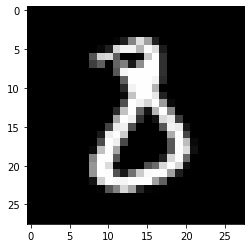


Prediction array: [[6.0280847e-05 3.1808595e-04 9.9914527e-01 4.1767690e-04 1.3485847e-09
  1.5691418e-05 2.4972935e-05 1.2815385e-08 1.7830731e-05 2.6881009e-09]]
Prediction: 2
Ground truth: 8


In [9]:
(_, _), (x_test, y_test) = mnist.load_data()
first_image = x_test[591]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
Y = prepare_X_data(x_unprepared_data=np.array([image]),printing=False)
prediction = model.predict(Y)
print()
print("Prediction array: " + str(prediction))
print("Prediction: " + str(np.argmax(prediction)))
print("Ground truth: " + str(y_test[591]))

In most cases the above functions will be enough. 
However if we have enormous data we cannot load into memory, we have to make use of a generator as show below.

A generator can return results when the result is needed. If the next result is queried, the generator will calculate the next result and return this next result. 
First we define a helper function to loop over a list indefinite (get_part_of_list)

In [10]:
def get_part_of_list(lst, start, items):
    end = len(lst)
    if start + items > end:
        missing = start + items - end
        result = lst[start:end]
        result = np.concatenate((result, lst[:missing]))
        return result, missing
    else:
        return lst[start:start + items], start + items


def train_generator(iterations=500):
    (x_train, y_train), (_, _) = mnist.load_data()  # Do not load all data in memory at once!
    iteration = 0
    start = 0
    batch_size = 128
    while True:
        if iterations == iteration:
            break
        x_unprep_subset, _ = get_part_of_list(lst=x_train, start=start, items=batch_size)
        y_unprep_subset, next_start = get_part_of_list(lst=y_train, start=start, items=batch_size)
        start = next_start
        x_prep_subset = prepare_X_data(x_unprepared_data=x_unprep_subset, printing=False)
        y_prep_subset = prepare_Y_data(y_unpreprared_data=y_unprep_subset, printing=False)
        yield x_prep_subset, y_prep_subset
        iteration += 1


def test_generator(iterations=100):
    (_, _), (x_test, y_test) = mnist.load_data()  # Do not load all data in memory at once!
    iteration = 0
    start = 0
    batch_size = 128
    while True:
        if iterations == iteration:
            break
        x_unprep_subset, _ = get_part_of_list(lst=x_test, start=start, items=batch_size)
        y_unprep_subset, next_start = get_part_of_list(lst=y_test, start=start, items=batch_size)
        start = next_start
        x_prep_subset = prepare_X_data(x_unprepared_data=x_unprep_subset,printing=False)
        y_prep_subset = prepare_Y_data(y_unpreprared_data=y_unprep_subset, printing=False)
        yield x_prep_subset, y_prep_subset
        iteration += 1
    

Next we will redefine our training & testing functions to use the generator:

In [11]:
def train_model_with_generator(model):
    train_gen = train_generator(iterations=500*12)
    model.fit(x=train_gen)
    print("save model")
    print("")
    save_model(model=model, filepath="example_model_generator.h5")


def eval_model_with_generator(model):
    test_gen = test_generator(iterations=100)
    score = model.evaluate(x=test_gen)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Finally we will combine the generator functions to train and test the model.

  ...
    to  
  ['...']
    100/Unknown - 7s 72ms/step - loss: 0.1110 - accuracy: 0.9680Test loss: 0.11096267261076719
Test accuracy: 0.96796876
Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   32 212 253  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  197 252 252 144   0   0   0   0   0   0]
 [  0   0   0   0   0   0   

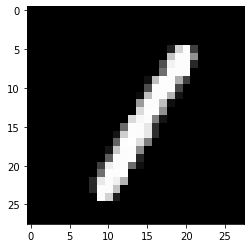

Prediction array: [[2.7117576e-06 9.9856240e-01 4.1994095e-05 3.7947335e-05 2.5607529e-04
  1.5466196e-06 1.1950199e-06 8.3808688e-04 2.4586296e-04 1.2158599e-05]]
Prediction: 1
Ground truth: 1

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  29 219 254 123   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  24 217 253 220  29   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  44 253 249 117   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4 126 253 125   0   0  13   0
    0   0   0   0   0 

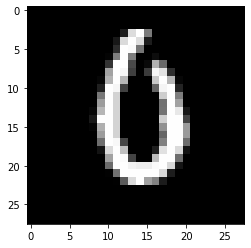

Prediction array: [[6.6263694e-01 3.4402683e-04 4.2340183e-03 4.3689637e-04 6.7087351e-03
  7.5812396e-03 3.1095681e-01 2.5083718e-03 1.5499718e-03 3.0429407e-03]]
Prediction: 0
Ground truth: 0

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  79 109 255 211 191 109  63   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  32 197 242 252 253 252 252 252 238 175
   21   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1 211 252 252 252 217 215 221 252 253 252
  175   0   0   0   0 

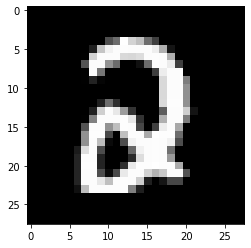

Prediction array: [[2.0731525e-03 2.1919325e-06 9.0167081e-01 9.3205348e-02 1.3893282e-06
  1.7945866e-05 1.9621230e-07 6.0853141e-05 2.9646058e-03 3.4592367e-06]]
Prediction: 2
Ground truth: 2

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 146 255 217   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  98 252 205   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  28 253 152   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 143 239  41   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2 156 228   0   0   0   0   0   0   0   0
    0   0   0   0   0 

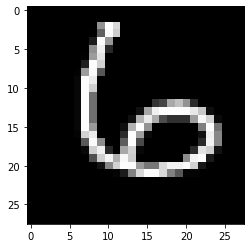

Prediction array: [[3.1191726e-06 2.3842551e-05 4.5471857e-04 2.0370618e-07 2.7367285e-05
  8.3821396e-05 9.9938452e-01 4.5275550e-07 2.1676844e-05 2.0753620e-07]]
Prediction: 6
Ground truth: 6

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13 180 255 240  52   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 153 253 253 253 227  24
    0   0   0   0   0 

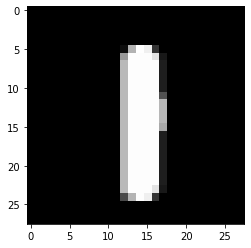

Prediction array: [[1.0524516e-06 9.8398191e-01 2.1570793e-05 4.1099303e-04 1.0325936e-04
  4.2735759e-05 7.9453152e-05 1.2835341e-04 1.2846277e-02 2.3844312e-03]]
Prediction: 1
Ground truth: 1

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3 141 208  38   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  16 254 254 243 116   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   8 191 239 240 254 245
  245 245 170 141 141 

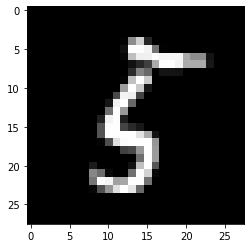

Prediction array: [[3.5981769e-03 1.5600563e-04 1.9393546e-04 1.7584427e-03 1.7366770e-05
  9.0621263e-01 3.1386251e-03 3.0272806e-06 8.4252372e-02 6.6949724e-04]]
Prediction: 5
Ground truth: 5

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 207 255 138   3
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  17 197 253 253 253   8
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  70 253 253 253 253   8
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 202 253 253 253 160   4
    0   0   0   0   0 

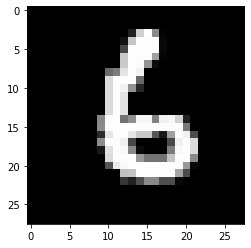

Prediction array: [[2.13447902e-06 9.25752011e-06 1.00712154e-04 8.15672763e-07
  7.07096842e-06 4.48795501e-04 9.99405265e-01 3.92071930e-09
  2.59088174e-05 1.06297321e-07]]
Prediction: 6
Ground truth: 6

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  65  77  77 137 190 255 254 254 248 165 165
   64   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  60 200 252 254 254 254 254 239 191 159 191 214 254
  182   0 

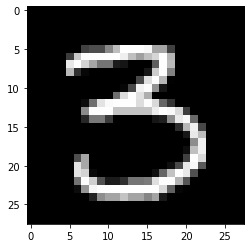

Prediction array: [[2.09493649e-08 6.18553827e-07 1.30341436e-06 9.97484088e-01
  1.05447825e-07 2.46866723e-03 1.16153608e-10 2.61950248e-08
  3.39307880e-05 1.12548869e-05]]
Prediction: 3
Ground truth: 3

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  52 125 238 143 125 228 254 254 160
  215 254 

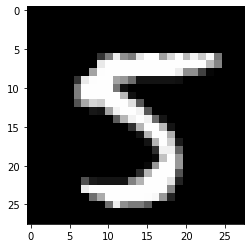

Prediction array: [[1.1566847e-09 1.5580466e-12 1.6578655e-11 5.4778798e-06 2.6449141e-11
  9.9997652e-01 1.2977309e-12 1.4537127e-10 4.7439571e-06 1.3237677e-05]]
Prediction: 5
Ground truth: 5

Input: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7 172 254 255 254 171  40   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  44 189 253 233 100 174 243 223  42   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151 253 231  47   0   0  98 253 223  16
    0   0   0   0   0 

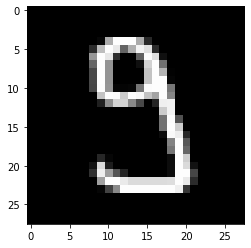

Prediction array: [[8.89587449e-04 1.40846299e-03 4.74917376e-03 8.63768756e-01
  6.14034871e-05 1.02937974e-01 1.66232312e-05 1.21453055e-03
  1.93342846e-02 5.61921904e-03]]
Prediction: 3
Ground truth: 9



In [12]:
model = create_model()
#train_model_with_generator(model=model)
model = load_model("example_model_generator.h5")
eval_model_with_generator(model)
for _ in range(10):
    random_predict(model)